In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## Intron chain, TSS, TES triplet analysis

In [8]:
# get list of detected filtered isoforms
sg = swan.read('../swan/swan.p')
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')
t_df, regions, counts = get_ic_tss_tes(sg,
                                         df,
                                         min_tpm=1, 
                                         gene_subset='polya',
                                         annot_slack=200,
                                         novel_slack=100)

# add triplets for samples
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')
temp = compute_triplets(t_df,
                        df,
                        min_tpm=1,
                        groupby='sample')
counts = pd.concat([counts, temp])

# add tpm on the sample level to the table
df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
gene_df,_ = get_tpm_table(df,
                         how='gene',
                         min_tpm=1, 
                         gene_subset='polya',
                         groupby='sample')
gene_df = gene_df.melt(ignore_index=False)
gene_df.rename({'value':'tpm'}, axis=1, inplace=True)
gene_df.reset_index(inplace=True)
gene_df.rename({'index': 'gid'}, axis=1, inplace=True)
counts = counts.merge(gene_df, how='left', left_on=['source', 'gid'], right_on=['biosample', 'gid'])

Read in graph from ../swan/swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 156027
# isos >= 1 tpm: 141390
Applying gene type and novelty subset
Number of isos reported: 92963
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 156027
# isos >= 1 tpm: 141390
Applying gene type and novelty subset
Number of isos reported: 92963
Found 31 total samples
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 352297
# genes >= 1 tpm: 217535
Applying gene type and novelty subset
Averaging over biosample
Found 31 total samples
Number of genes reported: 31968


In [9]:
t_df.loc[t_df.gname == 'COL3A1']

tname                 gid   gname  \
21069   ENCODEHT001735662  ENSG00000168542.14  COL3A1   
21070   ENCODEHT001735668  ENSG00000168542.14  COL3A1   
21071   ENCODEHT001735672  ENSG00000168542.14  COL3A1   
21072   ENCODEHT001735675  ENSG00000168542.14  COL3A1   
21073   ENCODEHT001735689  ENSG00000168542.14  COL3A1   
21074   ENCODEHT001735693  ENSG00000168542.14  COL3A1   
21075   ENCODEHT001735733  ENSG00000168542.14  COL3A1   
21077   ENCODEHT001735773  ENSG00000168542.14  COL3A1   
21078   ENCODEHT001735828  ENSG00000168542.14  COL3A1   
21079   ENCODEHT001735855  ENSG00000168542.14  COL3A1   
21083   ENCODEHT001735952  ENSG00000168542.14  COL3A1   
21089   ENCODEHT001735989  ENSG00000168542.14  COL3A1   
21091   ENCODEHT001736029  ENSG00000168542.14  COL3A1   
21092   ENCODEHT001736032  ENSG00000168542.14  COL3A1   
21093   ENCODEHT001736117  ENSG00000168542.14  COL3A1   
21094   ENCODEHT001736221  ENSG00000168542.14  COL3A1   
21095   ENCODEHT001736266  ENSG00000168542.14  COL3A1   
21096   ENCODEHT001736321  ENSG00000168542.14  COL3A1   
21097   ENCODEHT001736450  ENSG00000168542.14  COL3A1   
21098   ENCODEHT001736629  ENSG00000168542.14  COL3A1   
21099   ENCODEHT001736717  ENSG00000168542.14  COL3A1   
21100   ENCODEHT001736731  ENSG00000168542.14  COL3A1   
21101   ENCODEHT001736819  ENSG00000168542.14  COL3A1   
21102   ENCODEHT001736884  ENSG00000168542.14  COL3A1   
21103   ENCODEHT001736897  ENSG00000168542.14  COL3A1   
21106   ENCODEHT001737286  ENSG00000168542.14  COL3A1   
21107   ENCODEHT001737546  ENSG00000168542.14  COL3A1   
21108   ENCODEHT001737637  ENSG00000168542.14  COL3A1   
21109   ENCODEHT001737743  ENSG00000168542.14  COL3A1   
21111   ENCODEHT001738748  ENSG00000168542.14  COL3A1   
21112   ENCODEHT001738851  ENSG00000168542.14  COL3A1   
22052   ENCODEHT002272130  ENSG00000168542.14  COL3A1   
22053   ENCODEHT002272742  ENSG00000168542.14  COL3A1   
22055   ENCODEHT002273476  ENSG00000168542.14  COL3A1   
22056   ENCODEHT002274319  ENSG00000168542.14  COL3A1   
22058   ENCODEHT002276229  ENSG00000168542.14  COL3A1   
22061   ENCODEHT002277637  ENSG00000168542.14  COL3A1   
32157          COL3A1-201  ENSG00000168542.14  COL3A1   
34148          COL3A1-202  ENSG00000168542.14  COL3A1   
88168          COL3A1-203  ENSG00000168542.14  COL3A1   
100029         COL3A1-204  ENSG00000168542.14  COL3A1   
101858         COL3A1-205  ENSG00000168542.14  COL3A1   
115458         COL3A1-206  ENSG00000168542.14  COL3A1   

                                                     path                tid  \
21069   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735662   
21070   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735668   
21071   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735672   
21072   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735675   
21073   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735689   
21074   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735693   
21075   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735733   
21077   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735773   
21078   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735828   
21079   [141907, 957345, 957346, 141809, 141810, 14181...  ENCODEHT001735855   
21083   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735952   
21089   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001735989   
21091   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001736029   
21092   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001736032   
21093   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001736117   
21094   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001736221   
21095   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT001736266   
21096   [141907, 141807, 141808, 141809, 141810, 14181...  ENCODEHT0017

In [11]:
# what is going on with COL3A1?
temp_t_df = t_df.loc[t_df.gname == 'COL3A1']
temp = counts.loc[counts.gname == 'COL3A1']
temp['total'] = temp.tss+temp.splicing_ratio+temp.tes
temp['tss_ratio'] = temp.tss / temp.total
temp['spl_ratio'] = temp.splicing_ratio / temp.total
temp['tes_ratio'] = temp.tes / temp.total
temp.head()

tss  intron_chain  tes  tss_ic_tes  splicing_ratio         source  \
12388     4             6    5           6        1.333333        GENCODE   
71168     4            43    5          43        9.555556            all   
128965    1            39    3          39       19.500000            obs   
148125    1             1    1           1        1.000000        adipose   
160087    1             3    2           3        2.000000  adrenal gland   

                       gid   gname         biotype biotype_category     tf  \
12388   ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
71168   ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
128965  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
148125  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
160087  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   

            biosample         tpm      total  tss_ratio  spl_ratio  tes_ratio  
12388             NaN         NaN  10.333333   0.387097   0.129032   0.483871  
71168             NaN         NaN  18.555556   0.215569   0.514970   0.269461  
128965            NaN         NaN  23.500000   0.042553   0.829787   0.127660  
148125        adipose  120.909484   3.000000   0.333333   0.333333   0.333333  
160087  adrenal gland  135.990551   5.000000   0.200000   0.400000   0.400000

In [14]:
# col3a1
gc_c_dict = c_dict
gc_c_dict['GENCODE'] = 'k'
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL3A1',
            hue='source',
            size='tpm', 
            log_size=True,
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))}, 
            opref='figures/human')

In [ ]:
# save all observed triplets
temp = counts.loc[counts.source == 'obs']
temp.to_csv('obs_triplets.tsv', sep='\t', index=False)

In [14]:
# save triplets
counts.to_csv('triplets.tsv', sep='\t', index=False)

## Plotting

In [2]:
c_dict, order = get_biosample_colors()
c_dict['GENCODE'] = 'k'
counts = pd.read_csv('triplets.tsv', sep='\t')

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


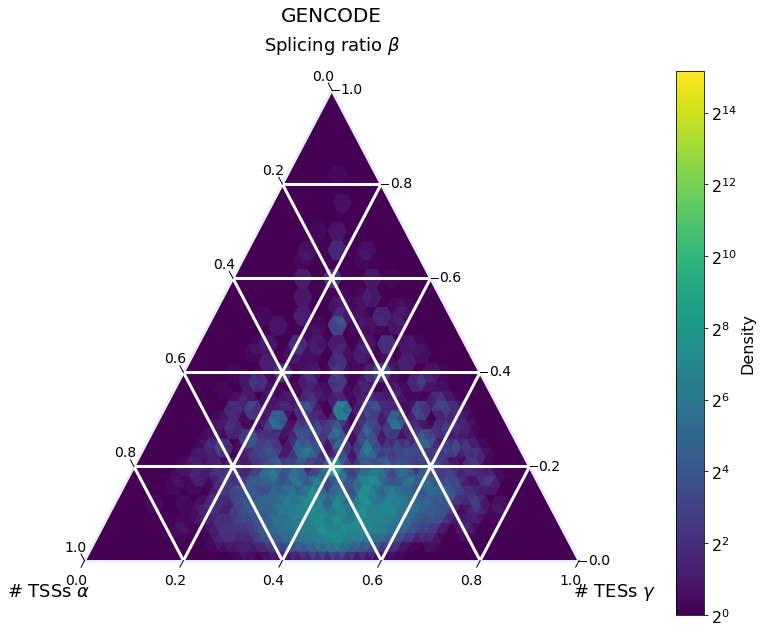

In [3]:
# gencode
temp = plot_dorito(counts,
            top='splicing_ratio',
            subset={'source': 'GENCODE'},
            density=True,
            density_scale=50,
            log_density=True,
            scatter=False,
            title='GENCODE',
            opref='figures/human')

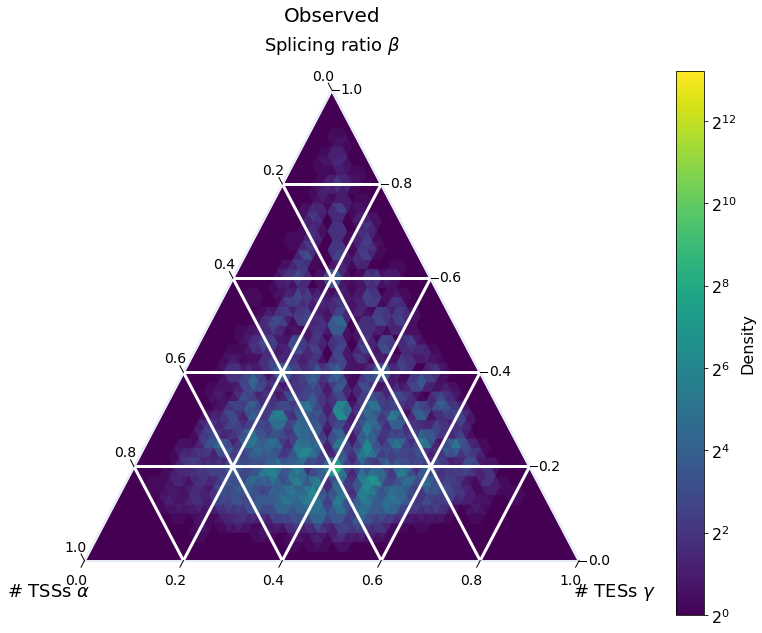

In [239]:
# observed
temp = plot_dorito(counts,
            top='splicing_ratio',
            subset={'source': 'obs'},
            density=True,
            density_scale=50,
            log_density=True,
            scatter=False,
            title='Observed',
            opref='figures/human')

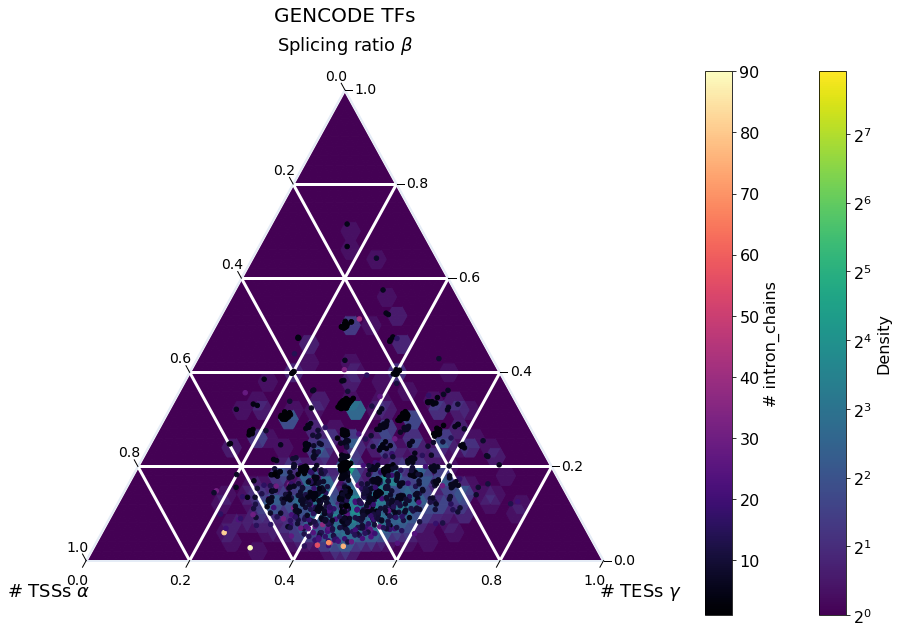

In [241]:
# all tfs in gencode
temp = plot_dorito(counts,
                top='splicing_ratio',
                hue='intron_chain',
                subset={'source': 'GENCODE', 'tf': True},
                jitter=True,
                density=True,
                density_scale=50,
                log_density=True,
                title='GENCODE TFs',
                opref='figures/human')

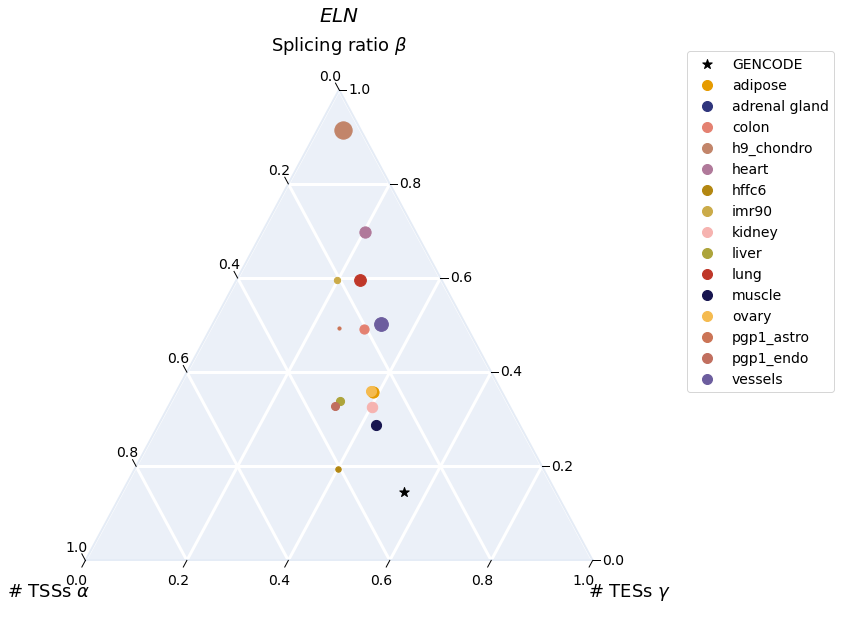

In [242]:
# ELN
gc_c_dict = c_dict
gc_c_dict['GENCODE'] = 'k'
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='ELN',
            hue='source',
            size='tpm', 
            log_size=True,
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))}, 
            opref='figures/human')

In [243]:
# MEF2C
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='MEF2C',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            density=True,
            density_scale=20,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))}, 
            opref='figures/human')

In [244]:
# TGIF1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TGIF1',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))}, 
            opref='figures/human')

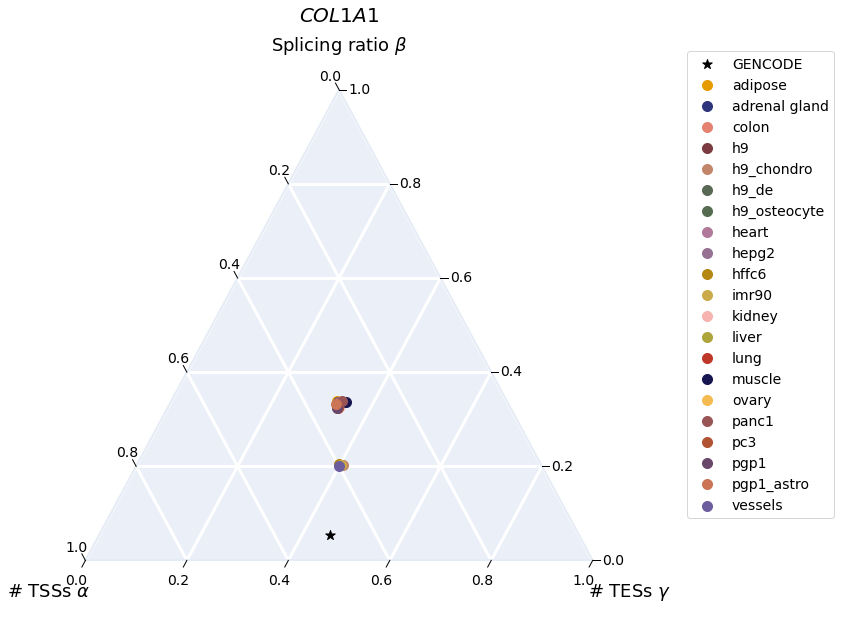

In [245]:
# COL1A1
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))}, 
            opref='figures/human')

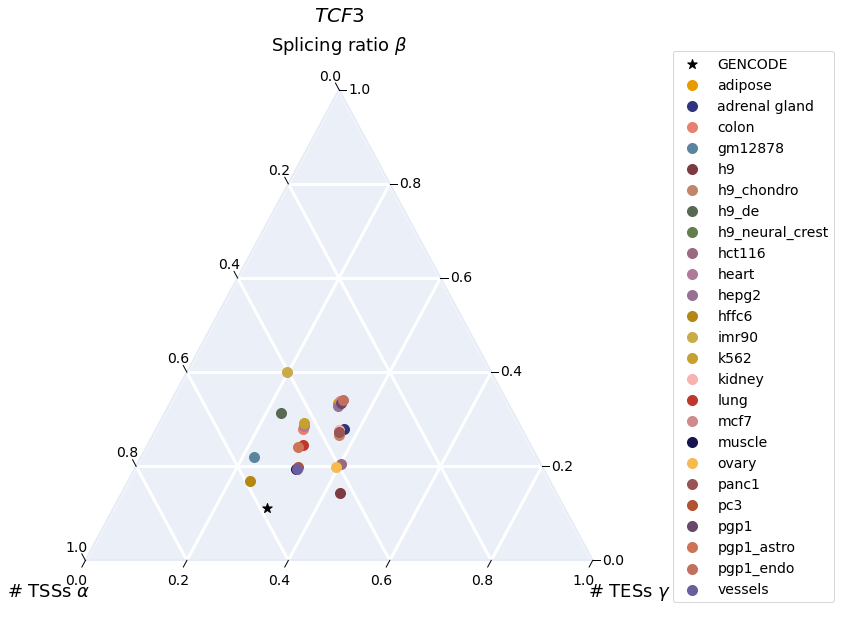

In [246]:
# TCF3
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF3',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

In [5]:
# COL3A1
gc_c_dict = c_dict
gc_c_dict['GENCODE'] = 'k'
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL3A1',
            hue='source',
            cmap=gc_c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

In [7]:
counts.loc[(counts.gname == 'COL3A1')&(counts.source=='obs')]
counts.loc[counts.gname == 'COL3A1']

tss  intron_chain  tes  tss_ic_tes  splicing_ratio           source  \
12388     4             6    5           6        1.333333          GENCODE   
71168     4            43    5          43        9.555556              all   
128965    1            39    3          39       19.500000              obs   
149130    1             1    1           1        1.000000          adipose   
163062    1             1    1           1        1.000000    adrenal gland   
178594    1             1    1           1        1.000000            colon   
224034    1             1    1           1        1.000000       h9_chondro   
250920    1             1    1           1        1.000000  h9_neural_crest   
262544    1             1    1           1        1.000000     h9_osteocyte   
275411    1             1    1           1        1.000000     h9_panc_beta   
288611    1             1    1           1        1.000000   h9_panc_progen   
301514    1             1    1           1        1.000000           hct116   
316636    1             1    1           1        1.000000            heart   
347486    1             1    1           1        1.000000            hffc6   
372176    1             1    1           1        1.000000            imr90   
400395    1             1    1           1        1.000000           kidney   
412697    1             1    1           1        1.000000            liver   
426261    1             1    1           1        1.000000             lung   
455769    1             1    1           1        1.000000           muscle   
469883    1             1    1           1        1.000000            ovary   
484610    1             1    1           1        1.000000            panc1   
497959    1             1    1           1        1.000000              pc3   
523955    1             1    1           1        1.000000       pgp1_astro   
560394    1             1    1           1        1.000000          vessels   

                       gid   gname         biotype biotype_category     tf  \
12388   ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
71168   ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
128965  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
149130  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
163062  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
178594  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
224034  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
250920  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
262544  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
275411  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
288611  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
301514  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
316636  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
347486  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
372176  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
400395  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
412697  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
426261  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
455769  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
469883  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
484610  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
497959  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
523955  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   
560394  ENSG00000168542.14  COL3A1  protein_coding   protein_coding  False   

              biosample           tpm  
12388               NaN           NaN  
7

In [247]:
# COL1A1
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            alpha=0.5,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

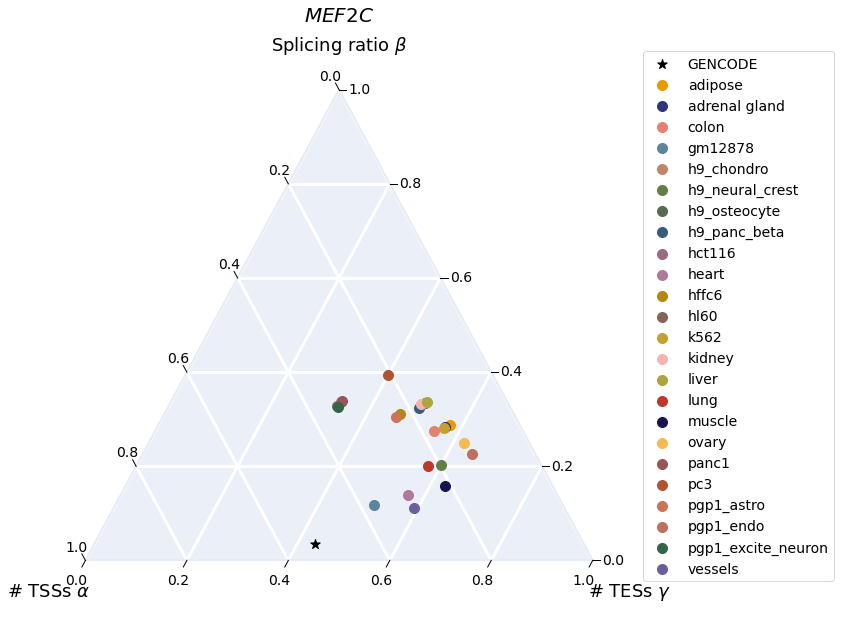

In [251]:
# MEF2C
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='MEF2C',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

In [252]:
# COL1A1
gc_c_dict = c_dict
gc_c_dict['GENCODE'] = 'k'
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            density=True,
            density_scale=20,
            jitter=True,
            alpha=0.5,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

In [253]:
# CTCF
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='CTCF',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            density=True,
            density_scale=20,
            jitter=True,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

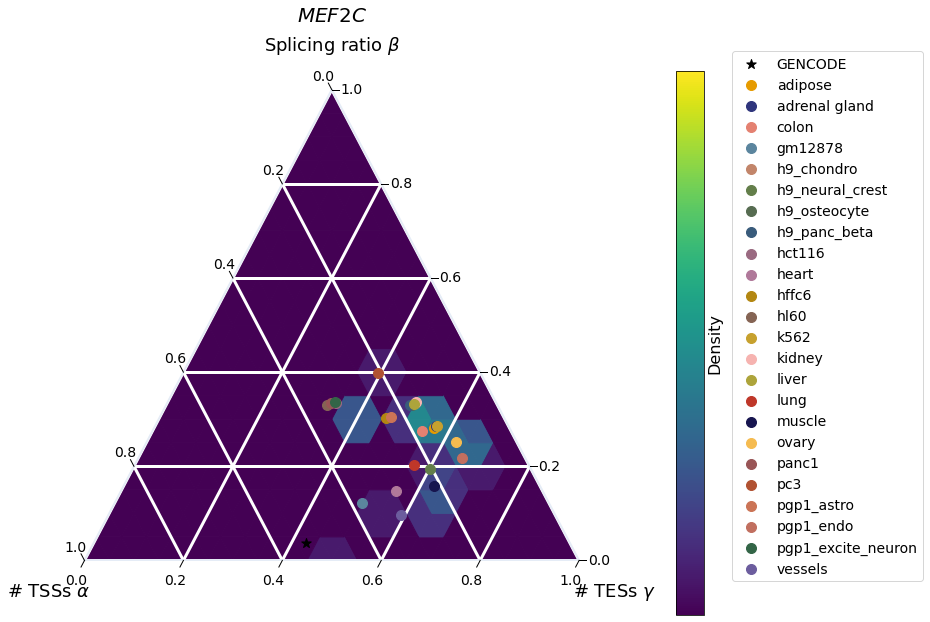

In [255]:
# MEF2C
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='MEF2C',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            density=True,
            density_scale=20,
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

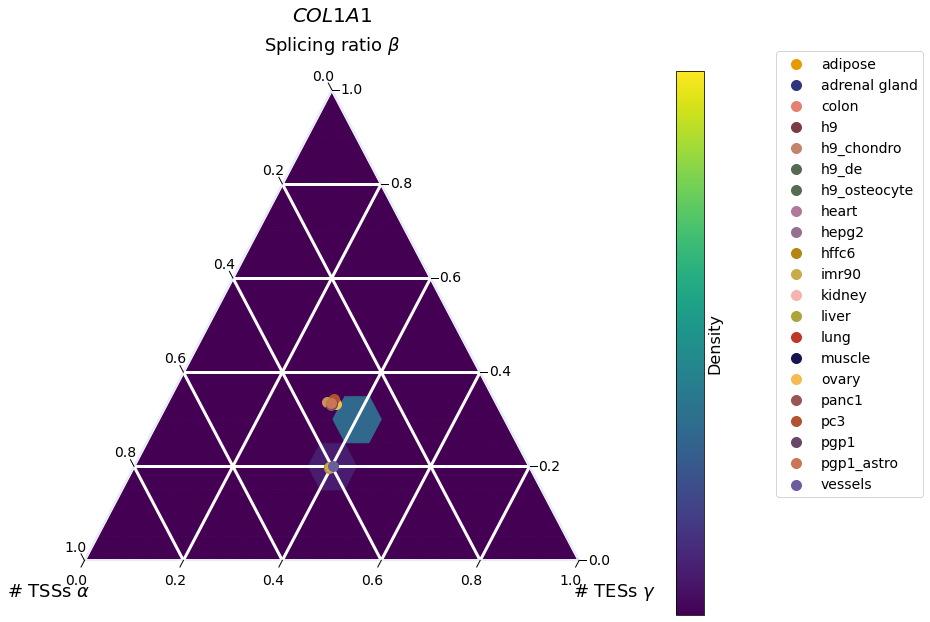

In [256]:
# COL1A1
temp = plot_dorito(counts,
            top='splicing_ratio', 
            gene='COL1A1',
            hue='source',
            cmap=c_dict,
            mmap={'GENCODE': '*'},
            jitter=True,
            density=True,
            density_scale=20,
            subset={'source':list(set(counts.source.unique().tolist())-set(['GENCODE', 'all', 'obs']))})

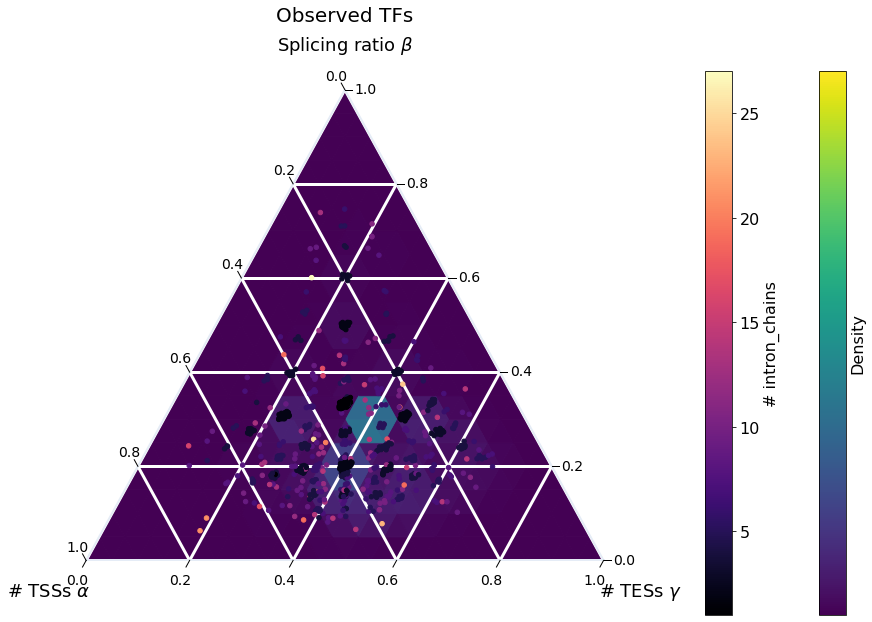

In [257]:
# all tfs in observed example
temp = plot_dorito(counts,
            top='splicing_ratio',
            hue='intron_chain',
            density=True, 
            density_scale=20,
            jitter=True,
            subset={'source': 'obs', 'tf': True},
            title='Observed TFs')

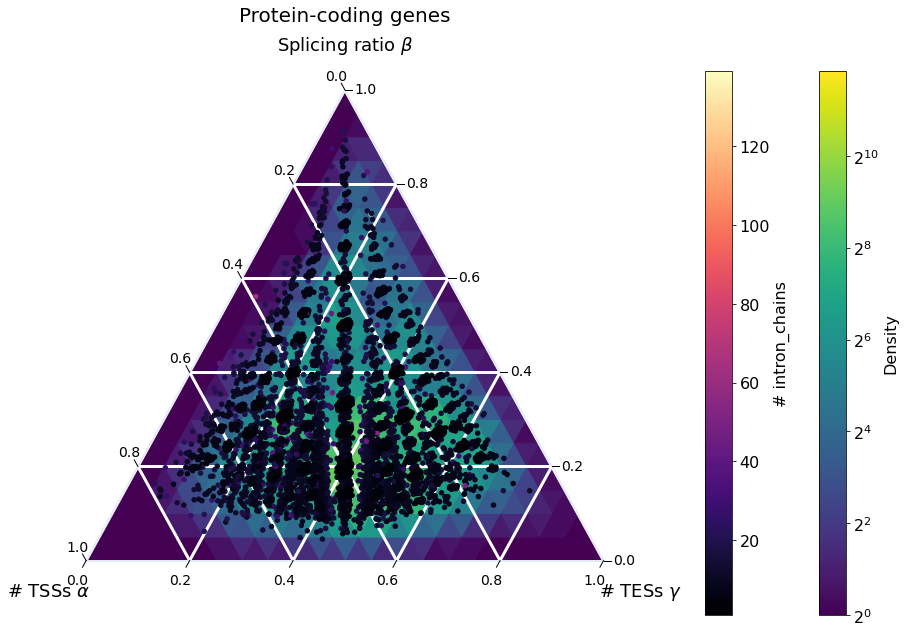

In [259]:
# all protein-coding genes in gencode example
_ = plot_dorito(counts,
            top='splicing_ratio',
            hue='intron_chain',
            density=True,
            density_scale=20,
            log_density=True,
            jitter=True,
            subset={'biotype': 'protein_coding', 'source': 'obs'},
            title='Protein-coding genes')

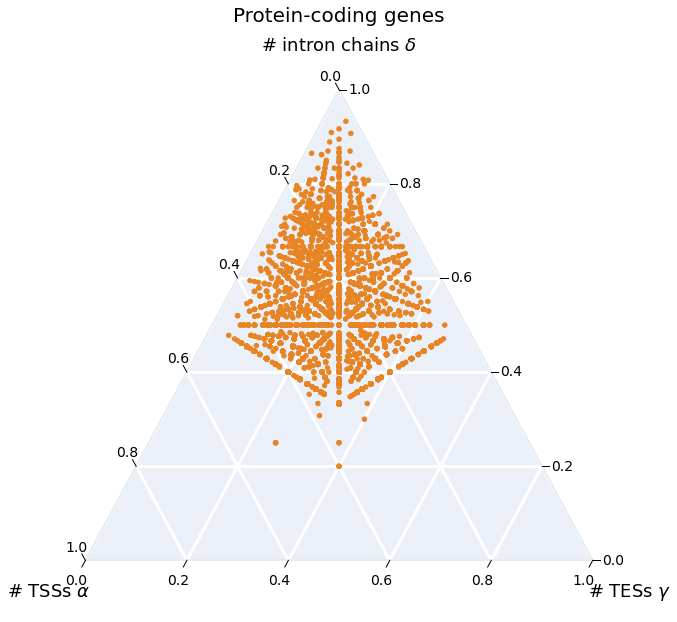

In [260]:
# all protein-coding genes in gencode example
_ = plot_dorito(counts,
            top='intron_chain',
            subset={'biotype': 'protein_coding', 'source': 'obs'},
            title='Protein-coding genes')

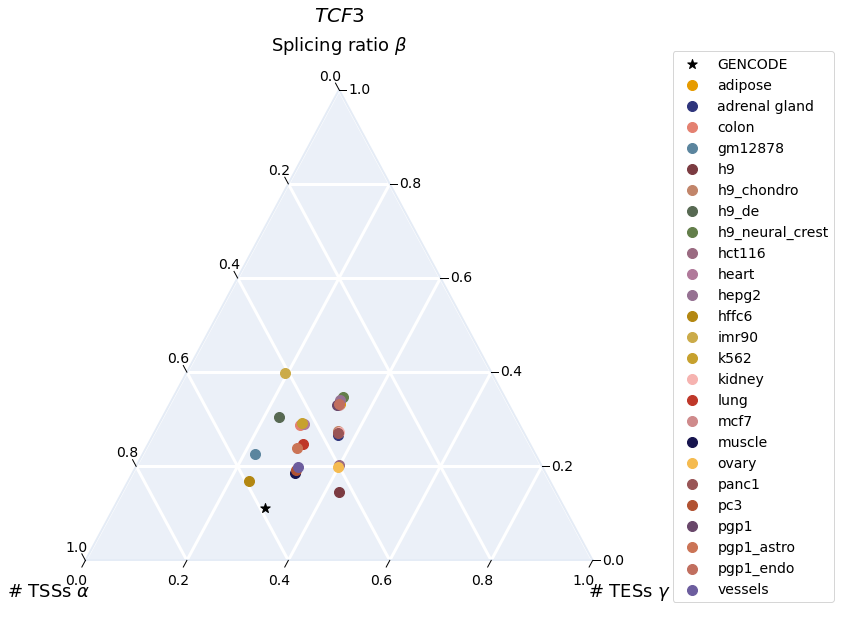

In [262]:
# gene example
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF3',
            hue='source',
            cmap=c_dict,
            jitter=True,
            mmap={'GENCODE': '*'},
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})

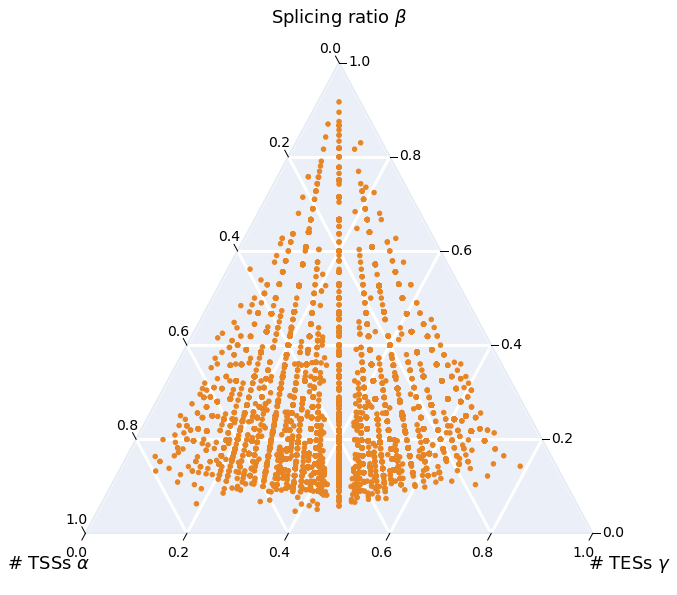

In [263]:
# obs example
_ = plot_dorito(counts,
            top='splicing_ratio',
            subset={'source': 'obs'})

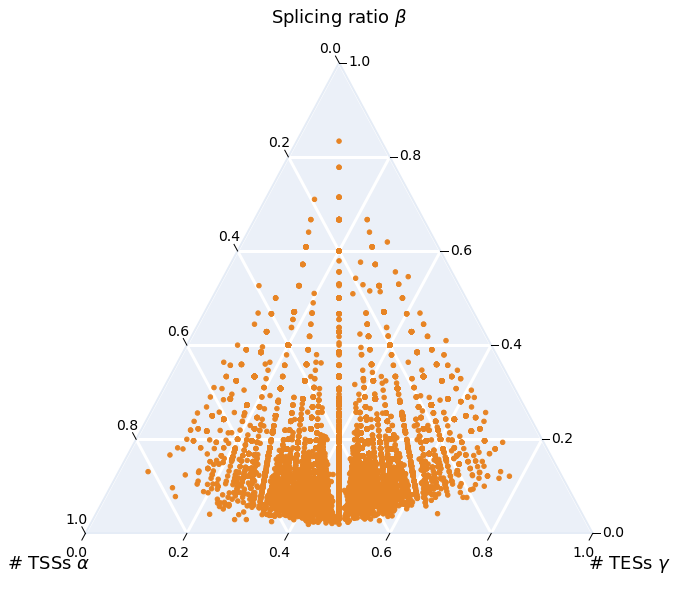

In [264]:
# gencode example
_ = plot_dorito(counts,
            top='splicing_ratio',
            subset={'source': 'GENCODE'})

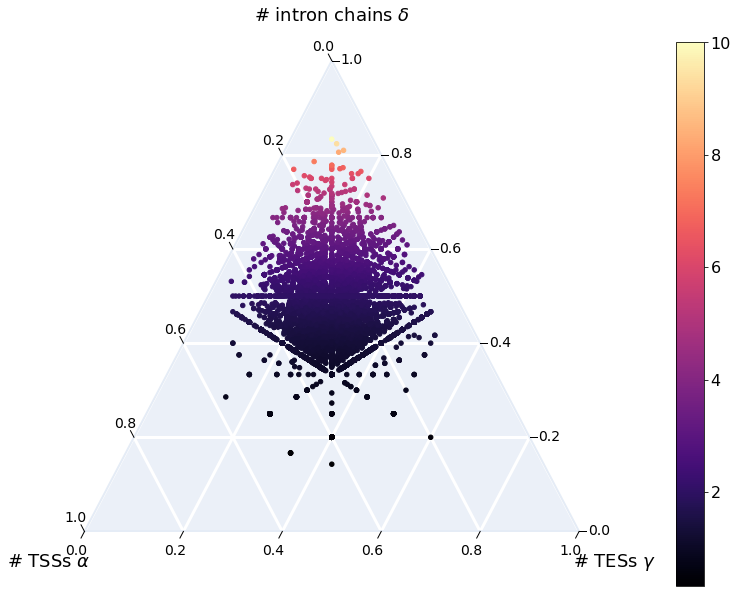

In [265]:
# gencode example - color by splicing ratio
_ = plot_dorito(counts,
            top='intron_chain',
            hue='splicing_ratio',
            subset={'source': 'GENCODE'})

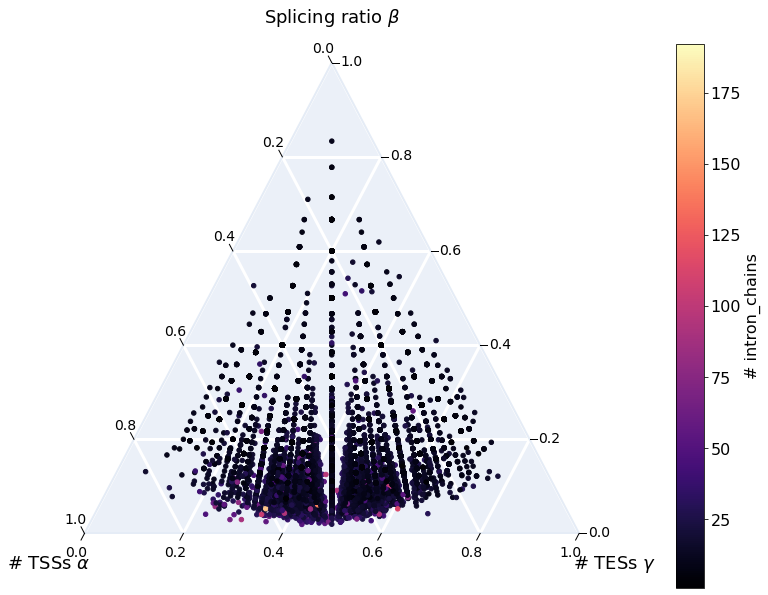

In [266]:
# gencode example - color by splicing ratio
_ = plot_dorito(counts,
            top='splicing_ratio',
            hue='intron_chain',
            subset={'source': 'GENCODE'})

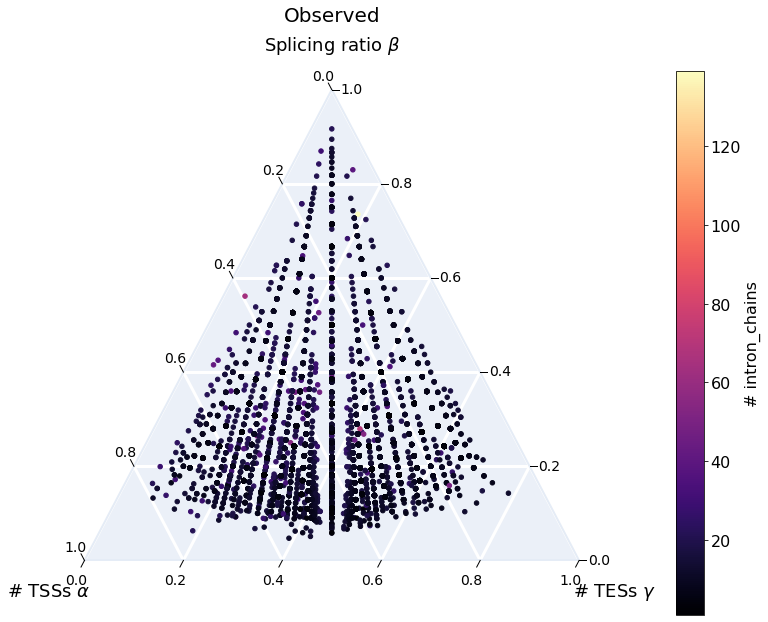

In [268]:
# observed example - color by n ic
_ = plot_dorito(counts,
            top='splicing_ratio',
            hue='intron_chain',
            subset={'source':'obs'},
            title='Observed')

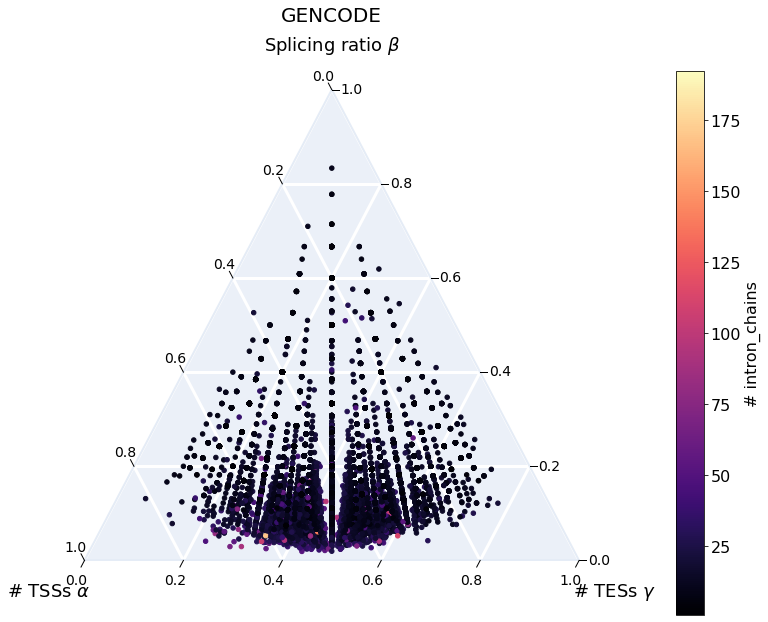

In [270]:
# gencode example - color by n ic
_ = plot_dorito(counts,
            top='splicing_ratio',
            hue='intron_chain',
            subset={'source':'GENCODE'},
            title='GENCODE')

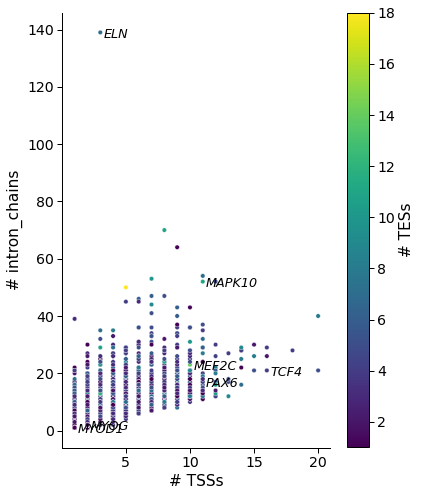

In [271]:
genes = ['PAX6', 'TCF4', 'MAPK10', 'ELN', 'MEF2C', 'MYOD1', 'MYOG']
plot_n_ic_tss_tes(counts.loc[counts.source=='obs'], 
                  label_genes=genes,
                  kind='obs',
                  opref='figures/human')

In [272]:
plot_genes_n_ic_ends(counts.loc[counts.source=='obs'], 
                     kind='obs', 
                     opref='figures/human')

In [3]:
# get list of detected filtered isoforms
sg = swan.read('../swan/swan.p')
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')
t_df, regions, counts = get_ic_tss_tes(sg,
                                         df,
                                         min_tpm=1, 
                                         gene_subset='polya',
                                         annot_slack=200,
                                         novel_slack=100)

# add 90% set triplets
df = pd.read_csv('../swan/isos_sample_gene_90.tsv', sep='\t')
temp = compute_triplets(t_df,
                        df, 
                        groupby='sample')
counts = pd.concat([counts, temp])

# add tpm on the sample level to the table
df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
gene_df,_ = get_tpm_table(df,
                         how='gene',
                         min_tpm=1, 
                         gene_subset='polya',
                         groupby='sample')
gene_df = gene_df.melt(ignore_index=False)
gene_df.rename({'value':'tpm'}, axis=1, inplace=True)
gene_df.reset_index(inplace=True)
gene_df.rename({'index': 'gid'}, axis=1, inplace=True)
counts = counts.merge(gene_df, how='left', left_on=['source', 'gid'], right_on=['biosample', 'gid'])

Read in graph from ../swan/swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 156027
# isos >= 1 tpm: 141390
Applying gene type and novelty subset
Number of isos reported: 92963
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 352297
# genes >= 1 tpm: 217535
Applying gene type and novelty subset
Averaging over biosample
Found 31 total samples
Number of genes reported: 31968


In [13]:
# gene example
_ = plot_dorito(counts,
            top='splicing_ratio', 
            gene='TCF3',
            hue='source',
            cmap=c_dict,
            jitter=True,
            mmap={'GENCODE': '*'},
            subset={'source':list(set(counts.source.unique().tolist())-set(['all', 'obs']))})